In [1]:
import numpy as np
import pandas as pd

In [2]:
##read in data
data = pd.read_csv("rideshare_kaggle.csv")
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
data.shape

(693071, 57)

In [4]:
data.nunique()

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

In [5]:
data.isna().sum().any()

True

In [6]:
data = data.dropna()

## Data Cleaning

We want to fit a model to predict ride price. Our theory is that the distance, hour of the day, day of the week(Fri,Sat,Sun or others), weather, type of the ride will impact the price and before doing so we want to change the categorical varibale of interest into a few dummy valiables for each category. 

In [7]:
##change day of the week to binary variables
from datetime import datetime
weekday = data.datetime.apply(lambda x: datetime.fromisoformat(str(x)).weekday())
data['Fri'] = (weekday==4).astype(int)
data['Sat'] = (weekday==5).astype(int)
data['Sun'] = (weekday==6).astype(int)

In [8]:
##change short summry of weather to binary variables
print(data.short_summary.unique())
for i in data.short_summary.unique():
    data[i] = (data.name == i).astype('int')

[' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Cloudy ' ' Overcast '
 ' Light Rain ' ' Foggy ' ' Possible Drizzle ' ' Drizzle ']


In [9]:
## split data for uber and lyft
lyft = data[:][data.cab_type == "Lyft"]
uber = data[:][data.cab_type == "Uber"]

In [10]:
print(lyft.product_id.unique())
print(lyft.name.unique())
print(uber.product_id.unique())
print(uber.name.unique())

['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux']
['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black']
['6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2']
['UberXL' 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']


In [11]:
pd.crosstab(lyft.product_id,lyft.name)

name,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared
product_id,,,,,,
lyft,0,0,0,51235,0,0
lyft_line,0,0,0,0,0,51233
lyft_lux,0,51235,0,0,0,0
lyft_luxsuv,0,0,51235,0,0,0
lyft_plus,0,0,0,0,51235,0
lyft_premier,51235,0,0,0,0,0


In [12]:
pd.crosstab(uber.product_id,uber.name)

name,Black,Black SUV,UberPool,UberX,UberXL,WAV
product_id,,,,,,
55c66225-fbe7-4fd5-9072-eab1ece5e23e,0,0,0,55094,0,0
6c84fd89-3f11-4782-9b50-97c468b19529,55095,0,0,0,0,0
6d318bcc-22a3-4af6-bddd-b409bfce1546,0,55096,0,0,0,0
6f72dfc5-27f1-42e8-84db-ccc7a75f6969,0,0,0,0,55096,0
997acbb5-e102-41e1-b155-9df7de0a73f2,0,0,55091,0,0,0
9a0e7b09-b92b-4c41-9779-2ad22b4d779d,0,0,0,0,0,55096


We see that the product id and name are same variable with different representations in both uber and lyft. Then #Creat dummy variables for lyft and uber cab type

In [13]:
#Creat biary variables for uber and lyft cab type
for i in lyft.name.unique():
    lyft[i] = (lyft.name == i).astype('int')

for i in uber.name.unique():
    uber[i] = (uber.name == i).astype('int')

No handles with labels found to put in legend.


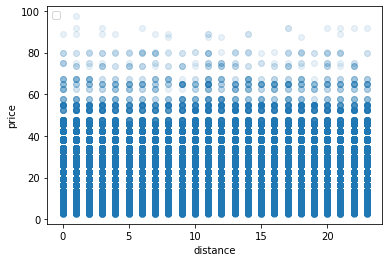

In [14]:
import matplotlib.pyplot as plt

np.random.seed(19680801)

x = lyft['hour']
y = lyft['price']

plt.scatter(x, y,alpha = 0.1)
plt.xlabel("distance")
plt.ylabel("price")
plt.legend(loc='upper left')
plt.show()

#seem to have no relation between hour and price, we would ignore hour for now 

In [15]:
from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

In [16]:
lyft_X = lyft[['distance','surge_multiplier','Fri', 'Sat','Sun',
               'Shared', 'Lyft XL', 'Lux Black XL', 'Lux', 'Lux Black', #Use Lyft as the baseline
               ' Mostly Cloudy ', ' Rain ', ' Partly Cloudy ', #Use Clear as baseline
               ' Overcast ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ',
               ' Drizzle ']]
lyft_y = lyft['price']

#train test split
lyft_X_train, lyft_X_test, lyft_y_train, lyft_y_test = train_test_split(
    lyft_X, lyft_y, test_size=0.20, random_state=325)

#cv
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
lyft_lasso_model = LassoCV(cv=cv)

#fit model
lyft_lasso_model.fit(lyft_X_train, lyft_y_train)

#display lambda that produced the lowest test MSE
print(lyft_lasso_model.alpha_)

0.003923518277292391


In [17]:
print('train score is', lyft_lasso_model.score(lyft_X_train,lyft_y_train))
print('test score is', lyft_lasso_model.score(lyft_X_test,lyft_y_test))

train score is 0.936467063224665
test score is 0.9363139000740862


In [18]:
lyft_lasso_coefs = pd.concat([pd.Series(lyft_X.columns), pd.Series(lyft_lasso_model.coef_)], axis=1)
lyft_lasso_coefs.columns = ['Variable','Coefficient']
lyft_lasso_coefs.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Variable,distance,surge_multiplier,Fri,Sat,Sun,Shared,Lyft XL,Lux Black XL,Lux,Lux Black,Mostly Cloudy,Rain,Partly Cloudy,Overcast,Light Rain,Foggy,Possible Drizzle,Drizzle
Coefficient,3.23895,17.9545,0,0,0,-2.95202,5.60589,22.6326,8.07783,13.3823,0,0,0,0,0,0,0,0


We see that both day of the week and weather variable are in significant in predicting price.

In [23]:
uber_X = uber[['distance','surge_multiplier','Fri', 'Sat','Sun',
               'UberPool','UberXL','Black','Black SUV', 'WAV', #Use UberX as base line
               ' Mostly Cloudy ', ' Rain ', ' Partly Cloudy ', #Use Clear as baseline
               ' Overcast ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ',
               ' Drizzle ']]
uber_y = uber['price']

#train test split
uber_X_train, uber_X_test, uber_y_train, uber_y_test = train_test_split(
    uber_X, uber_y, test_size=0.20, random_state=325)

#cv
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
uber_lasso_model = LassoCV(cv=cv)

#fit model
uber_lasso_model.fit(uber_X_train, uber_y_train)

#display lambda that produced the lowest test MSE
print(uber_lasso_model.alpha_)

0.003393381782850588


In [24]:
print('train score is', uber_lasso_model.score(uber_X_train,uber_y_train))
print('test score is', uber_lasso_model.score(uber_X_test,uber_y_test))

train score is 0.9200365797050548
test score is 0.9187468252746804


In [25]:
uber_lasso_coefs = pd.concat([pd.Series(uber_X.columns), pd.Series(uber_lasso_model.coef_)], axis=1)
uber_lasso_coefs.columns = ['Variable','Coefficient']
uber_lasso_coefs.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Variable,distance,surge_multiplier,Fri,Sat,Sun,UberPool,UberXL,Black,Black SUV,WAV,Mostly Cloudy,Rain,Partly Cloudy,Overcast,Light Rain,Foggy,Possible Drizzle,Drizzle
Coefficient,2.43863,0,-0,0,-0,-1.01498,5.85382,10.7161,20.4654,-0.00466697,0,0,0,0,0,0,0,0
